In [1]:
# Importing required libraries
import qiskit
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import Aer, execute, IBMQ

from math import *
import random
import operator

# A Problem With The QASM-Simulator
After running certain 'most simple' circuits, it has come to my notice that the qasm_simulator does not work in the most expected way. And with the addition of more qubits and gates, the noise in the results increases in the simulator than in an actual Quantum Computer. I would like to demonstrate what I mean by this below:

In [2]:
qr = QuantumRegister(2, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)

In [3]:
for i in range(0, 2):
    qc.h(qr[i])

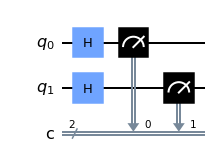

In [4]:
for i in range(0, 2):
    qc.measure(qr[i], cr[i])
    
qc.draw('mpl')

# QASM-Simulator
The bars should be around 0.250

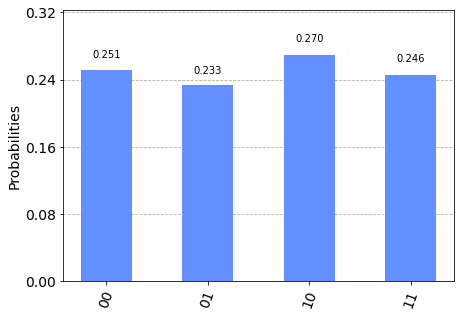

In [5]:
simulator = Aer.get_backend('qasm_simulator', shots = 8192)
job = execute(qc, simulator)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

In [6]:
provider = IBMQ.load_account()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

# Actual Quantum Computer
Better result than the simulator

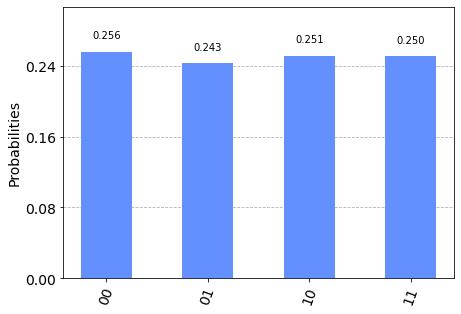

In [7]:
backend = provider.get_backend('ibmq_athens')
max_shots = 8192
job = execute(qc, backend, shots = max_shots)
counts = job.result().get_counts()
plot_histogram(counts)

# Now let us add more qubits
And witness the added noise and result difference between the simulator and actual hardware

In [8]:
# Quantum Configuration
qr = QuantumRegister(3, "q")
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(qr, cr)

In [9]:
# Initialize the qubits
for i in range(0, 3):
    qc.h(qr[i])

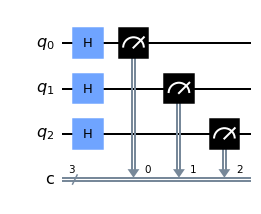

In [10]:
for i in range(0, 3):
    qc.measure(qr[i], cr[i])
    
qc.draw('mpl')

# QASM-Simulator
The results should be around 0.125

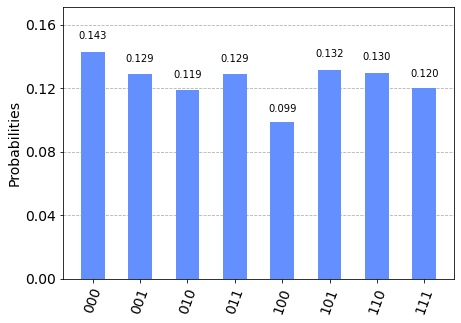

In [11]:
simulator = Aer.get_backend('qasm_simulator', shots = 8192)
job = execute(qc, simulator)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

As we can see, the noise is significant

# Actual Quantum Computer

Significantly better results

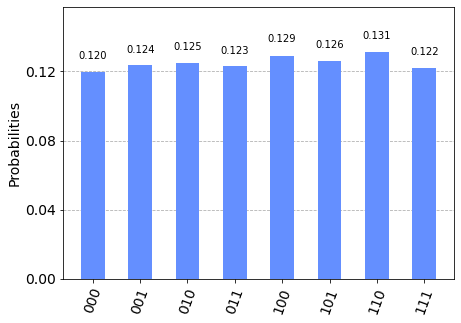

In [12]:
backend = provider.get_backend('ibmq_athens')
max_shots = 8192
job = execute(qc, backend, shots = max_shots)
counts = job.result().get_counts()
plot_histogram(counts)